# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
We will try to answer the following questions.

<ol>
    <li>Relation between revenue and movie popularity?</li>
    <li>Relation between budget and movie popularity?</li>
    <li>How increasingly the mean popilarity of movies produced by year?</li>
    <li>How increasingly the number of movies produced by year?</li>
    <li>How revenues changed over years?</li>
    <li>How vote avarage changed over years?</li>
    <li>How vote counts changed over years?</li>
    <li>How runtime changed over years?</li>
    <li>Which genres are most generating revenues?</li>
</ol>
    

In [562]:
# Load needed python libraries
# import matplotlib for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

**Load data**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean  dataset for analysis.

### General Properties

In [563]:
# Load my data and print out a few lines. Perform operations to inspect data
#   types and explore data info

def load_data():
    """Simple function to load data from csv file using pandas
    """
    df = pd.read_csv('tmdb-movies.csv')
    return df

if __name__ == '__main__':
    df = load_data()

In [564]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [565]:
# Perform operations to inspect data shape
#   types and explore data infolook for instances of missing or possibly errant data.
df.shape

(10866, 21)

In [566]:
# inspect data statistics across all data available 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [567]:
# show the first 5 records of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning (Replace this with more specific notes!)

In [568]:
# Drop and remove unneeded columns that with no importance to our analysis
columns = ['imdb_id', 'cast','imdb_id','homepage','tagline','keywords','overview','production_companies']
df.drop(columns, axis=1, inplace=True)

In [569]:
# Check if there is missing data in release_date column
df.release_date.isna().sum()

0

In [570]:
# Convert drelease date into datetime64 
df.release_date = pd.to_datetime(df.release_date)

In [571]:
# Check if there is missing data in runtime column
df[df.runtime == 0].index

Int64Index([  92,  334,  410,  445,  486,  595,  616, 1241, 1289, 1293, 1849,
            2315, 2370, 3329, 3794, 3857, 3884, 4063, 4138, 4829, 4944, 5216,
            5695, 5920, 5938, 5992, 6040, 6383, 6552, 6934, 8874],
           dtype='int64')

In [572]:
# drop records with 0 runtime from dataframe
df.drop(df[df.runtime == 0].index, inplace = True)

In [573]:
# Show first 5 records of the data after removing unneeded columns
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [470]:
# # Divide budget, revenue, budget_adj, revenue_adj by 1 million to remove extra 0
# df.revenue = df.revenue / 1000000
# df.budget = df.budget / 1000000
# pd.to_numeric(df.budget_adj)
# pd.to_numeric(df.revenue_adj)

In [574]:
# show data info after removing the unnececcery columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10835 non-null  int64         
 1   popularity      10835 non-null  float64       
 2   budget          10835 non-null  int64         
 3   revenue         10835 non-null  int64         
 4   original_title  10835 non-null  object        
 5   director        10793 non-null  object        
 6   runtime         10835 non-null  int64         
 7   genres          10813 non-null  object        
 8   release_date    10835 non-null  datetime64[ns]
 9   vote_count      10835 non-null  int64         
 10  vote_average    10835 non-null  float64       
 11  release_year    10835 non-null  int64         
 12  budget_adj      10835 non-null  float64       
 13  revenue_adj     10835 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


In [575]:
# Explore the generes in case it will help our analysis
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [576]:
# Count records with no genres
df.genres.isna().sum()

22

In [577]:
# drop records with no genres
df.dropna(subset=['genres'], inplace=True)

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10813 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10813 non-null  int64         
 1   popularity      10813 non-null  float64       
 2   budget          10813 non-null  int64         
 3   revenue         10813 non-null  int64         
 4   original_title  10813 non-null  object        
 5   director        10773 non-null  object        
 6   runtime         10813 non-null  int64         
 7   genres          10813 non-null  object        
 8   release_date    10813 non-null  datetime64[ns]
 9   vote_count      10813 non-null  int64         
 10  vote_average    10813 non-null  float64       
 11  release_year    10813 non-null  int64         
 12  budget_adj      10813 non-null  float64       
 13  revenue_adj     10813 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


In [579]:
# Count records with no genres
df.director.isna().sum()

40

In [580]:
# drop records with no director
df.dropna(subset=['director'], inplace=True)

In [582]:
# Create new Dataframe that only has budget (Exclude 0)
df_with_budget = df[df['budget'] != 0]

In [583]:
# create clean dataframe that has value for 
#  revenue and budget for further analysis
df_clean = df_with_budget[df_with_budget['revenue'] != 0]

In [584]:
# Divide budget, revenue, budget_adj, revenue_adj by 1 million to remove extra 0
pd.to_numeric(df_clean.budget_adj)
pd.to_numeric(df_clean.revenue_adj)


0        1.392446e+09
1        3.481613e+08
2        2.716190e+08
3        1.902723e+09
4        1.385749e+09
             ...     
10822    2.266436e+08
10828    8.733419e+07
10829    4.030809e+07
10835    1.343603e+08
10848    8.061618e+07
Name: revenue_adj, Length: 3854, dtype: float64

In [585]:
# Explore the count of generes across the data
df_clean.genres.value_counts()

Drama                                   245
Comedy                                  233
Drama|Romance                           107
Comedy|Romance                          104
Comedy|Drama|Romance                     91
                                       ... 
Science Fiction|Comedy|Crime|Action       1
Action|Adventure|Crime|Drama|Mystery      1
Horror|Science Fiction|Fantasy            1
Horror|Thriller|Fantasy                   1
Crime|Drama|Mystery|Thriller|Action       1
Name: genres, Length: 1053, dtype: int64

In [586]:
# Show the diminsion of the new created datafram 
df_clean.shape

(3854, 14)

In [618]:
# loop through all dataframe records to get all available genres
genres = {}
for index, all_data in df_clean.genres.items():
    genre_list = all_data.split("|")
    for genre in genre_list:     
        # Check if genre exists in the dictionary
        # Add genre to dictionary and count
        if genre in genres:
            genres[genre] += 1
        else:
            genres[genre] = 1
    
# print(genres)

genres_mean = {}
popularity_mean = {}
# get the mean for each genere from the previously created dictionary with all genres
for key, value in genres.items():
    g_mean = df_clean[df_clean.genres.str.contains(key)].revenue_adj.mean()
    genres_mean[key] = g_mean
    
    p_mean = df_clean[df_clean.genres.str.contains(key)].popularity.mean()   
    popularity_mean[key] = p_mean
    
# print out genres means
print(popularity_mean)


{'Action': 1.5662222679558002, 'Adventure': 1.8676930360480621, 'Science Fiction': 1.8708381980769224, 'Thriller': 1.25840014439834, 'Fantasy': 1.7543145328282812, 'Crime': 1.1231517239263809, 'Western': 1.1342457115384612, 'Drama': 1.0016666486332575, 'Family': 1.4590434094117635, 'Animation': 1.710621930348258, 'Comedy': 1.0129579307295515, 'Mystery': 1.1426125901162782, 'Romance': 0.9561014579579578, 'War': 1.246129226890756, 'History': 0.9706737131782947, 'Music': 0.899004676470588, 'Horror': 0.8540047753779699, 'Documentary': 0.2944576285714286, 'Foreign': 0.1822709166666667, 'TV Movie': 0.27362800000000004}


In [592]:
df_clean[df_clean.genres.str.contains('Adventure')]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,17339,0.435312,5000000,7230000,Force 10 from Navarone,Guy Hamilton,118,Action|Adventure|War|Thriller,1978-11-01,39,6.6,1978,1.671350e+07,2.416773e+07
10788,24961,0.277769,24000000,21049053,The Wiz,Sidney Lumet,134,Adventure|Family|Fantasy|Music|Science Fiction,1978-10-24,30,6.1,1978,8.022482e+07,7.036068e+07
10793,11837,0.226002,1000000,3713768,Watership Down,Martin Rosen,88,Adventure|Animation|Drama,1978-10-14,67,6.8,1978,3.342701e+06,1.241401e+07
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


In [522]:
df_clean.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000.0,1513528.810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000.0,378436.354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000.0,295238.201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000.0,2068178.225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000.0,1506249.360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [345]:
# Display numerical summaries of some statistical measure for centrality and variability
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000
mean,38804.777990,1.230725,38.767758,113.319771,109.746313,551.466139,6.187384,2001.025942,46.126051,144.242430
std,66694.281264,1.501724,42.644307,179.339072,19.971226,896.135729,0.785966,11.384691,45.080215,219.360570
min,5.000000,0.001117,0.000093,1.000000,26.000000,10.000000,3.300000,1960.000000,0.000090,0.527468
25%,5550.250000,0.484835,11.000000,17.000000,96.000000,78.000000,5.700000,1995.000000,14.777857,23.092904
50%,11083.500000,0.842417,25.000000,50.000000,106.000000,225.000000,6.200000,2004.000000,31.657303,67.456897
75%,37158.000000,1.414530,50.000000,131.750000,120.000000,606.000000,6.700000,2010.000000,62.675775,172.907662
max,417859.000000,32.985763,425.000000,2782.000000,338.000000,9767.000000,8.400000,2015.000000,425.000000,2827.123750


In [166]:
# Create a function to plot a scatter plot
def plot_rel(df, arg1, arg2, kind, color, title):
    """Function will have arguments
    Args:
        param1: Source Dataframe.
        param2: X data column name.
        param3: Y data column name.
        param4: Kind of the plot.
        param5: color of the plot points.
    Returns:
        The return plot.
    """
    df.plot(x=arg1, y=arg2, color=color, alpha=0.5, kind=kind)
    plt.title(title)
    plt.show()    

In [198]:
def format_tick_val(tick_point, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_point >= 1000000000:
        val = round(tick_point/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_point >= 1000000:
        val = round(tick_point/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_point >= 1000:
        val = round(tick_point/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_point < 1000:
        new_tick_format = round(tick_point, 1)
    else:
        new_tick_format = tick_point

    # Format new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    return new_tick_format

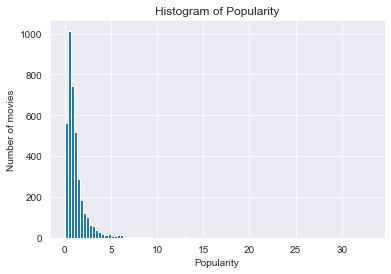

In [545]:
# Show the distribution of popularity
df_clean.popularity.hist(bins=100);
plt.xlabel('Popularity')
plt.ylabel('Number of movies')
plt.title('Histogram of Popularity');

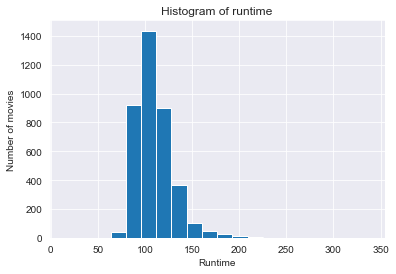

In [542]:
# Show the distribution of runtime
df_clean.runtime.hist(bins=20);
plt.xlabel('Runtime')
plt.ylabel('Number of movies')
plt.title('Histogram of runtime');

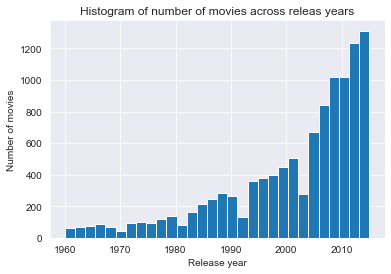

In [541]:
# Show the distribution of adjusted revenues
df.release_year.hist(bins=30);
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.title('Histogram of number of movies across releas years');

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (relation between revenue and movie popularity)

Invesigating if there is a relation between revenue and movie popularity

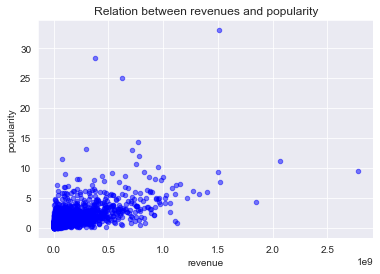

In [167]:
# plot scatter chart to check if there is corelation between 
# Revenues and popularity
plot_rel(df_clean, 'revenue', 'popularity','scatter', 'blue', 'Relation between revenues and popularity')

### Research Question 2 (relation between budget and movie popularity)
Invesigating if there is a relation between budget and movie popularity

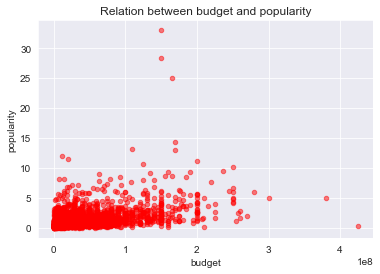

In [169]:
# plot scatter chart to check if there is corelation between 
# Budget and popularity
plot_rel(df_clean, 'budget', 'popularity','scatter', 'r','Relation between budget and popularity')

### Research Question 3 (how increasingly the mean popilarity of movies produced by year)

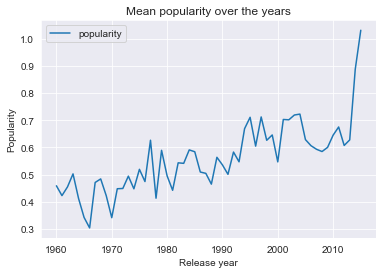

In [174]:
# plot line chart to check the trend of 
#  Mean popularity over the years
df.groupby('release_year').popularity.mean().plot()
plt.xlabel('Release year')
plt.ylabel('Popularity')
plt.title('Mean popularity over the years')
plt.legend();

### Research Question 4 (how increasingly the number of movies produced by year)

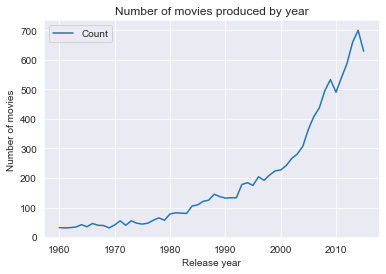

In [173]:
# plot line chart to check the trend of 
#  Count popularity over the years
df.groupby('release_year').popularity.count().plot()
plt.ylabel('Number of movies')
plt.xlabel('Release year')
plt.title('Number of movies produced by year')
plt.legend(['Count']);

### Research Question 5 (how revenues changed over years)

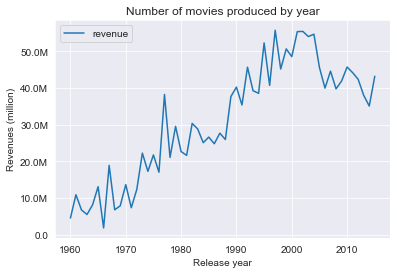

In [546]:
# plot line chart to check the trend of 
#  Mean Revenues over the years
df.groupby('release_year').revenue.mean().plot()
plt.ylabel('Revenues (million)')
plt.xlabel('Release year')
plt.title('Number of movies produced by year')
plt.legend()
yx = plt.gca()
yx.yaxis.set_major_formatter(tick.FuncFormatter(format_tick_val));

In [181]:
# explore the revenue in year 2015
df[df.release_year == 2015].revenue.mean()

42547616.08585056

### Research Question 6 (how vote avarage changed over years)

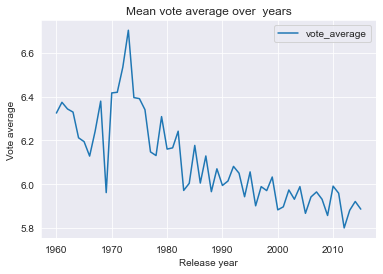

In [200]:
# plot line chart to check the trend of 
#  vote avarage over years
df.groupby('release_year').vote_average.mean().plot()
plt.xlabel('Release year')
plt.ylabel('Vote average')
plt.title('Mean vote average over  years')
plt.legend();

### Research Question 7 (how vote counts changed over years)

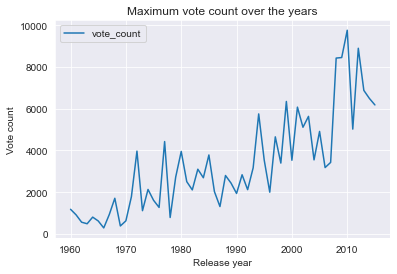

In [202]:
# plot line chart to check the trend of 
#  Maximum vote score over the years
df.groupby('release_year').vote_count.max().plot()
plt.xlabel('Release year')
plt.ylabel('Vote count')
plt.title('Maximum vote count over the years')
plt.legend();

### Research Question 8 (how dun time changed over years)

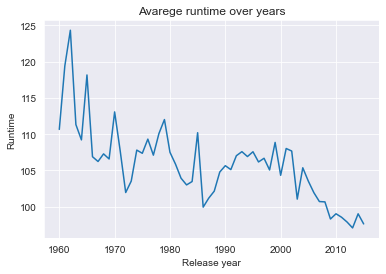

In [597]:
# plot line chart to check the trend of 
#  runtime over the years
df.groupby('release_year').runtime.mean().plot()
plt.xlabel('Release year')
plt.ylabel('Runtime')
plt.title('Avarege runtime over years');

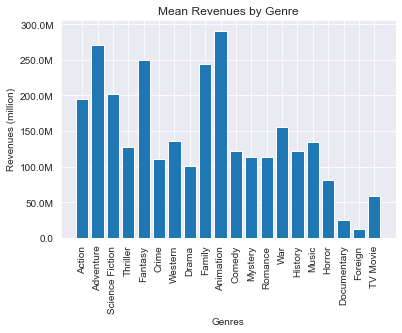

In [604]:
# plot bar chart to show adjusted revenues for each genre
plt.bar(*zip(*genres_mean.items()))
plt.xticks(rotation = 90)  # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Genres')
plt.ylabel('Revenues (million)')
plt.title('Mean Revenues by Genre')
yx = plt.gca()
yx.yaxis.set_major_formatter(tick.FuncFormatter(format_tick_val));

we Can clearly notice that certain movie genres generate revenue more than others, for example Animation genre generate around 250 Million, and (Animation, Fantasy, Adventure and Family) genres generates around 200 Million.

On the other hands, Foreign movies is the least generating genre.

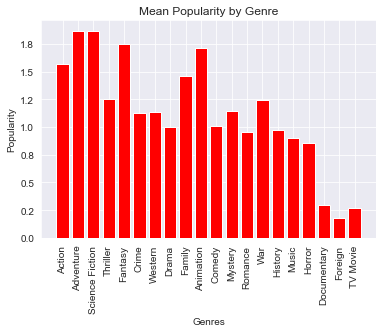

In [620]:
# plot bar chart to show popularity for each genre
plt.bar(*zip(*popularity_mean.items()), color="r")
plt.xticks(rotation = 90)  # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Mean Popularity by Genre')
yx = plt.gca()
yx.yaxis.set_major_formatter(tick.FuncFormatter(format_tick_val));

<a id='conclusions'></a>
## Conclusions

based on the data given, we found the following findings

<ul>
<li> There is no direct relation between movie budget and revenue to the popularity of the movie </li>
<li> there is increase in movies populirity by time</li>
<li> There is increase in mdb items by time</li>
<li> There is increase of mdb by time and the peak was around 2000 and it started to decrease</li>
<li> There is decrease on avarage vote on mdb items </li>
<li> There is increase in vote count by years</li>
<li> There is decrease in runtime of the movies by time</li>
<li> some genres like Animation, Fantasy, Adventure and Family generate the top of other genres</li>
<li> some genres like Animation, science fiction, Fantasy and Adventure more popular than others genres</li>
</ul>
<a id='conclusions'></a>

### Limitaions

based on the data given, we found the following limitaions

<ul>
<li> Dropping lines from the dataset for budget and revenues with 0 value have dectreased the dataset almost to the third</li>
<li> Dependent variable data is not of normal disribution when reviewed in the histogram</li>
</ul>